In [1]:
%pylab inline
import matplotlib.gridspec as gridspec
from scipy import integrate
from scipy.integrate import quad

Populating the interactive namespace from numpy and matplotlib


In [8]:
def f(t,x,y,z):
    return (R*z*cos(t))/(R**2-2*x*R*cos(t)-2*R*y*sin(t)+x**2+y**2+z**2)**(3/2)

def g(t,x,y,z):
    return (R*z*sin(t))/(R**2-2*x*R*cos(t)-2*R*y*sin(t)+x**2+y**2+z**2)**(3/2)

def h(t,x,y,z):
    return (R**2-x*R*cos(t)-y*R*sin(t))/(R**2-2*x*R*cos(t)-2*R*y*sin(t)+x**2+y**2+z**2)**(3/2)

In [9]:
def ff(x,y,z):
    return quad(lambda t: f(t,x,y,z), 0, 2*pi)[0]

def gg(x,y,z):
    return quad(lambda t: g(t,x,y,z), 0, 2*pi)[0]

def hh(x,y,z):
    return quad(lambda t: h(t,x,y,z), 0, 2*pi)[0]

In [10]:
R=10
m=40
d=0.7
dd=0.15
y=arange(-m, m+d, d)
z=arange(-m, m+d, d)
Y, Z = meshgrid(y,z)

u=zeros((len(y),len(z)))
w=zeros((len(y),len(z)))
for i in range(len(y)):
    for j in range(len(z)):
        u[i,j]=gg(0,y[i],z[j])
        w[i,j]=hh(0,y[i],z[j])

for i in range(len(yy)):
    for j in range(len(zz)):
        U[i,j]=gg(0,yy[i],zz[j])
        W[i,j]=hh(0,yy[i],zz[j])

P_0 = sqrt(U.T**2 + W.T**2)

yy=arange(-m, m+dd, dd)
zz=arange(-m, m+dd, dd)
YY, ZZ = meshgrid(yy,zz)

U=zeros((len(yy),len(zz)))
W=zeros((len(yy),len(zz)))

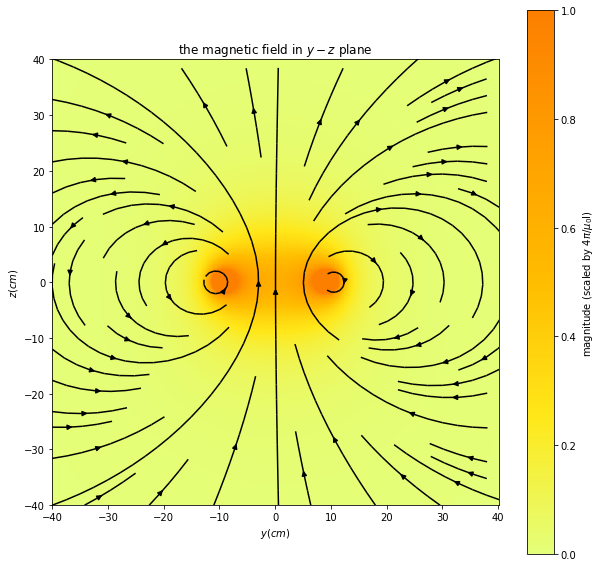

In [17]:
figure(figsize=(10,10))
streamplot(Y, Z, u.T, w.T, density=[0.5, 1], color='k')

im = imshow(P_0, extent=(amin(YY),amax(YY),amin(ZZ),amax(ZZ)),cmap=plt.get_cmap('Wistia'),vmin=0,vmax=1)
cb=colorbar(im)
cb.set_label(r'magnitude (scaled by $4\pi/\mu_0 $I) ')

title(r'the magnetic field in $y-z$ plane')
xlabel(r'$y(cm)$')
ylabel(r'$z(cm)$')
show()